# Data Science: Titanic classification
**Survived or not Survived ?**

**Problem definition:** On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Solution:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Objectives:** The data science solutions workflow solves for seven major goals: Classifying, Correlating, Converting, Completing, Correcting, Creating, Charting. 

# imports

In [1]:
##To be installed for the first time
# !conda install --yes -c conda-forge missingno
# !conda install --yes -c anaconda requests

In [2]:
#Import Standard Python Libraries¶
import io, os, sys, types, time, datetime, math, random,requests

In [3]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Pre-processing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier,Perceptron

from sklearn.tree import DecisionTreeClassifier
# import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

# Download Data

In [4]:
# Download
DATASET = (
    "https://www.kaggle.com/c/titanic/download/train.csv",
)

def download_data(path='dataset', urls=DATASET):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        response = requests.get(url)
        print(response)
        name = os.path.basename(url)
        with open(os.path.join(path, name), 'w') as f:
            f.write(response.content)

# download_data()

# Read Data

In [5]:
train_path = "./input/train.csv"
train_df = pd.read_csv(train_path, sep=",")
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_path = "./input/test.csv"
test_df = pd.read_csv(test_path, sep=",")
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Exploration - Univariate

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Descriptions

**PassengerId (int64):** Passengar ID

**Pclass (int64):** Ticket class {1 = 1st, 2 = 2nd, 3 = 3rd}

**Name (object):** Passeger name

**Sex (object):** Sex

**Age (float64):** Age in years

**SibSp (int64):** Number of siblings/spouses aboard the Titanic

**Parch (int64):** Number of parents/children aboard the Titanic

**Ticket (object):** Ticket number

**Fare (float64):** Passenger fare

**Cabin (object):** Cabin number

**Embarked (object):** Port of Embarkation {C = Cherbourg, Q = Queenstown, S = Southampton}

**Survived (int64):** Survival status {0 = No, 1 = Yes}

----------------------------------------------

**Categorical:** Survived, Sex, and Embarked

**Ordinal:** Pclass

**Continous:** Age, Fare 

**Discrete:** SibSp, Parch.

### Numerical Features

In [8]:
# Describing all the Numerical Features
train_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Some Useful insights**

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224)
Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.

### Categorical Features

In [9]:
# Describing all the Categorical Features
train_df.describe(include=[object]).T

,count,unique,top,freq
Name,891,891,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


**Some Useful insights**

Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

## Data Distribution: Univariate Distributions

An overall veiw to all features

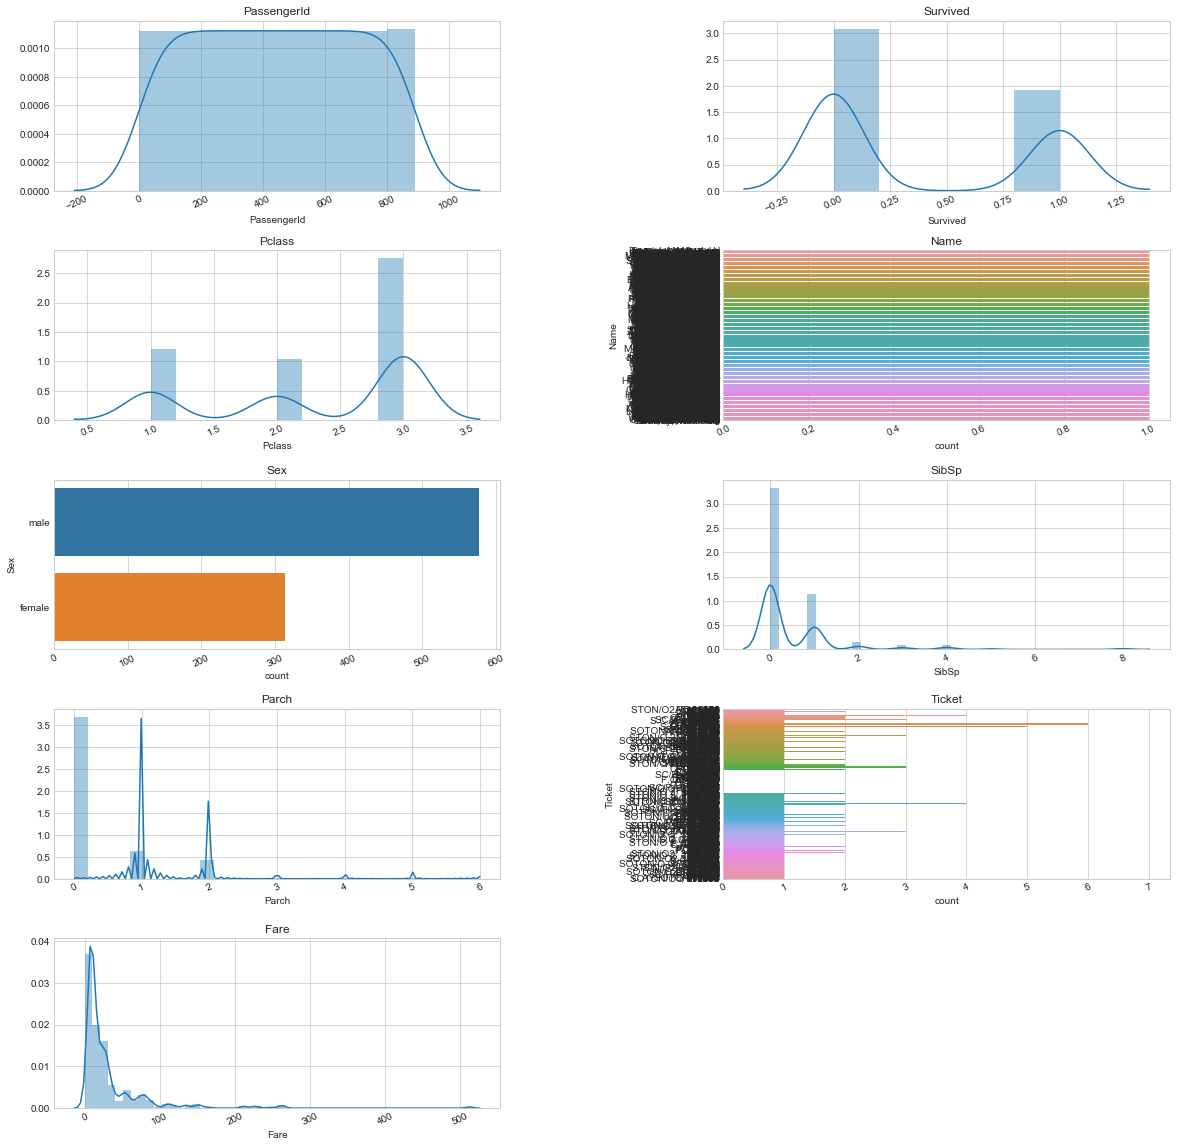

In [10]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

train_df_nonNAN=train_df[train_df.columns[~train_df.isnull().any()]]
# train_df_nonNAN.drop(["PassengerId","Name","Ticket"], axis = 1, inplace = True)
plot_distribution(train_df_nonNAN, cols=2, width=20, height=20, hspace=0.35, wspace=0.5)

## Missing values

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

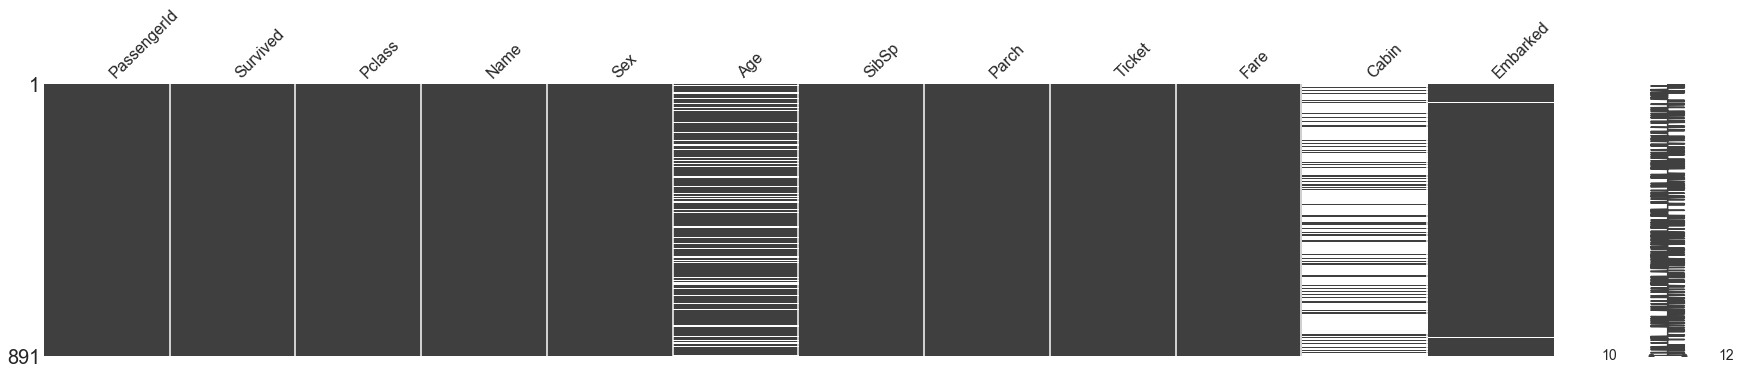

In [12]:
# How many missing values are there in our dataset?
missingno.matrix(train_df, figsize = (30,5))

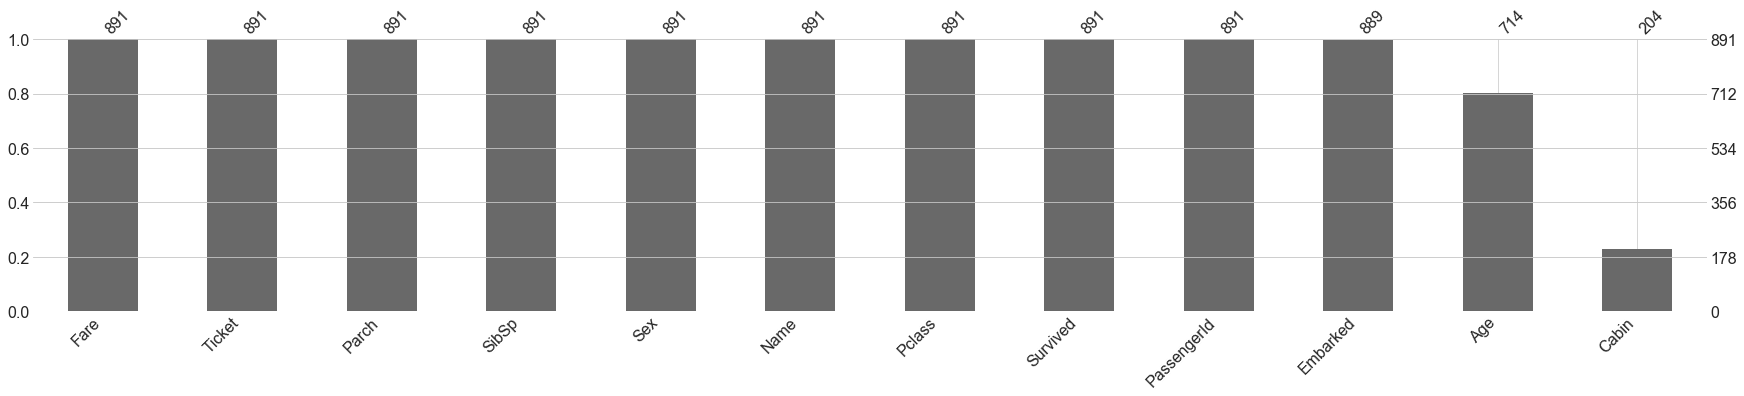

In [13]:
# How many missing values are there in our dataset?
missingno.bar(train_df, sort='descending', figsize = (30,5))

## Feature Cleaning, Engineering, and Imputation
Feature by Feature

### Target Feature: Servived

0    549
1    342
Name: Survived, dtype: int64


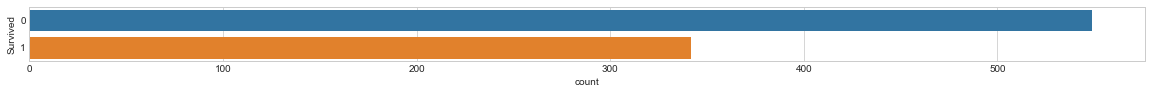

In [14]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train_df);
print(train_df.Survived.value_counts())

### Feature: Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64


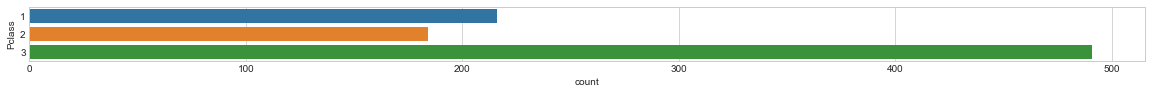

In [15]:
#Ticket class
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Pclass', data=train_df);
print(train_df.Pclass.value_counts())

### Feature:  Name

In [16]:
print(train_df.Name.value_counts())

Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)    1
Bracken, Mr. James H                                    1
Fortune, Mr. Mark                                       1
Hays, Mrs. Charles Melville (Clara Jennings Gregg)      1
Becker, Miss. Marion Louise                             1
                                                       ..
Weir, Col. John                                         1
Kirkland, Rev. Charles Leonard                          1
Svensson, Mr. Johan                                     1
Marechal, Mr. Pierre                                    1
Kassem, Mr. Fared                                       1
Name: Name, Length: 891, dtype: int64


#### Creating Title Feature: 
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.
In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [17]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(train_df.Title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Don           1
Capt          1
Lady          1
Countess      1
Mme           1
Sir           1
Name: Title, dtype: int64


We can replace many titles with a more common name or classify them as **Rare**.

**Ms.** is a polite and non-sexist way of referring to a woman without emphasizing her married status.

**Mlle** is a French courtesy title, abbreviated Mlle, traditionally given to an unmarried woman. 

**Mme** is Madame for a woman in french.

In [18]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

print(train_df.Title.value_counts())   

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)

print(train_df.Title.value_counts())   

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64


#### Droping Name and PassengerId

In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1, errors='ignore')
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


### Feature: Sex

male      577
female    314
Name: Sex, dtype: int64


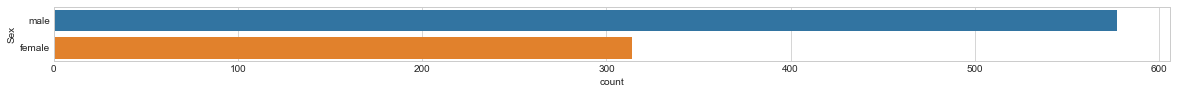

In [21]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train_df);
print(train_df.Sex.value_counts())

0    577
1    314
Name: Sex, dtype: int64


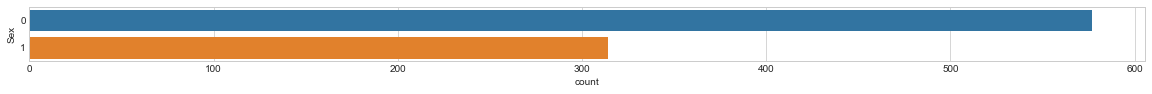

In [22]:
# change sex to 0 for male and 1 for female
train_df['Sex'] = np.where(train_df['Sex'] == 'female', 1, 0)
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train_df);
print(train_df.Sex.value_counts())

### Feature: Age

In [23]:
print(train_df.Age.isnull().sum())

177


Fill the NaN age values
grouping passenger based on their title and then fill the Nan values by the aveerage age of each group.

Master is a title for an underage male. If a person is under 18, master would be used.

In [24]:
train_df["Age"] = train_df.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean())) 
print(train_df.Age.isnull().sum())

0


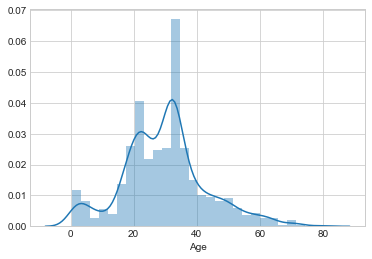

In [25]:
sns.distplot(train_df["Age"])
plt.show()

### Feature: SibSp and  Parch¶ 

To consider Number of siblings/spouses (**SibSp**) and Number of parents/children (**Parch**) aboard the Titanic

In [26]:
print(train_df.SibSp.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [27]:
print(train_df.Parch.value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


#### Create FamilySize and IsAlone Features
Create new feature **FamilySize** which combines Parch and SibSp. This will enable us to evaluate both at the same time.

Create new feature **IsAlone** which combines Parch and SibSp. This will enable us to evaluate both at the same time.

In [28]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']+1

train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,2,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,2,0
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1,1,1


#### Droping SibSp and Parch

In [29]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1, errors='ignore')
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,1,2,0
1,1,1,1,38.0,PC 17599,71.2833,C85,C,3,2,0
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,2,1,1
3,1,1,1,35.0,113803,53.1000,C123,S,3,2,0
4,0,3,0,35.0,373450,8.0500,NaN,S,1,1,1


### Feature: Ticket

In [30]:
# How many kinds of ticket are there?
print(train_df.Ticket.value_counts())
# print(len(train_df.Ticket.value_counts()))

1601                 7
347082               7
CA. 2343             7
CA 2144              6
3101295              6
                    ..
364511               1
4579                 1
PC 17482             1
STON/O 2. 3101288    1
239856               1
Name: Ticket, Length: 681, dtype: int64


It seems that this feature is not much useful, howevert there might be some trick to benefit of this feature (e.g. similat to Name)  

In [31]:
train_df = train_df.drop(['Ticket'], axis=1, errors='ignore')
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,NaN,S,1,2,0
1,1,1,1,38.0,71.2833,C85,C,3,2,0
2,1,3,1,26.0,7.9250,NaN,S,2,1,1
3,1,1,1,35.0,53.1000,C123,S,3,2,0
4,0,3,0,35.0,8.0500,NaN,S,1,1,1


### Feature: Fare

In [32]:
# How many kinds of ticket are there?
print(train_df.Fare.value_counts())
# print(len(train_df.Fare.value_counts()))

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


### Feature: Cabin

As it has too many null values, let's remove it..

In [33]:
train_df = train_df.drop(['Cabin'], axis=1, errors='ignore')
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,S,1,2,0
1,1,1,1,38.0,71.2833,C,3,2,0
2,1,3,1,26.0,7.9250,S,2,1,1
3,1,1,1,35.0,53.1000,S,3,2,0
4,0,3,0,35.0,8.0500,S,1,1,1


### Feature: Embarked

In [34]:
print(train_df.Embarked.isnull().sum())

2


In [35]:
print(train_df.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


We can simply 1) remove the rows with nan Embarked or 2) fill them by the most frequent value.

In [36]:
# 1)
# train_df.dropna(subset=['Embarked'], inplace=True)

# 2)
most_freq_port = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_freq_port)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,S,1,2,0
1,1,1,1,38.0,71.2833,C,3,2,0
2,1,3,1,26.0,7.9250,S,2,1,1
3,1,1,1,35.0,53.1000,S,3,2,0
4,0,3,0,35.0,8.0500,S,1,1,1


In [37]:
print(train_df.Embarked.isnull().sum())

0


In [38]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,0,1,2,0
1,1,1,1,38.0,71.2833,1,3,2,0
2,1,3,1,26.0,7.9250,0,2,1,1
3,1,1,1,35.0,53.1000,0,3,2,0
4,0,3,0,35.0,8.0500,0,1,1,1


# Data Exploration - Bi-variate Analysis

So far, we have analised all features individually. Let's now start combining some of these features together to obtain further insight into the interactions between them.

Plot a count of the categories from each categorical feature split by our prediction class: salary - predclass.


## Plot bivariate_bar

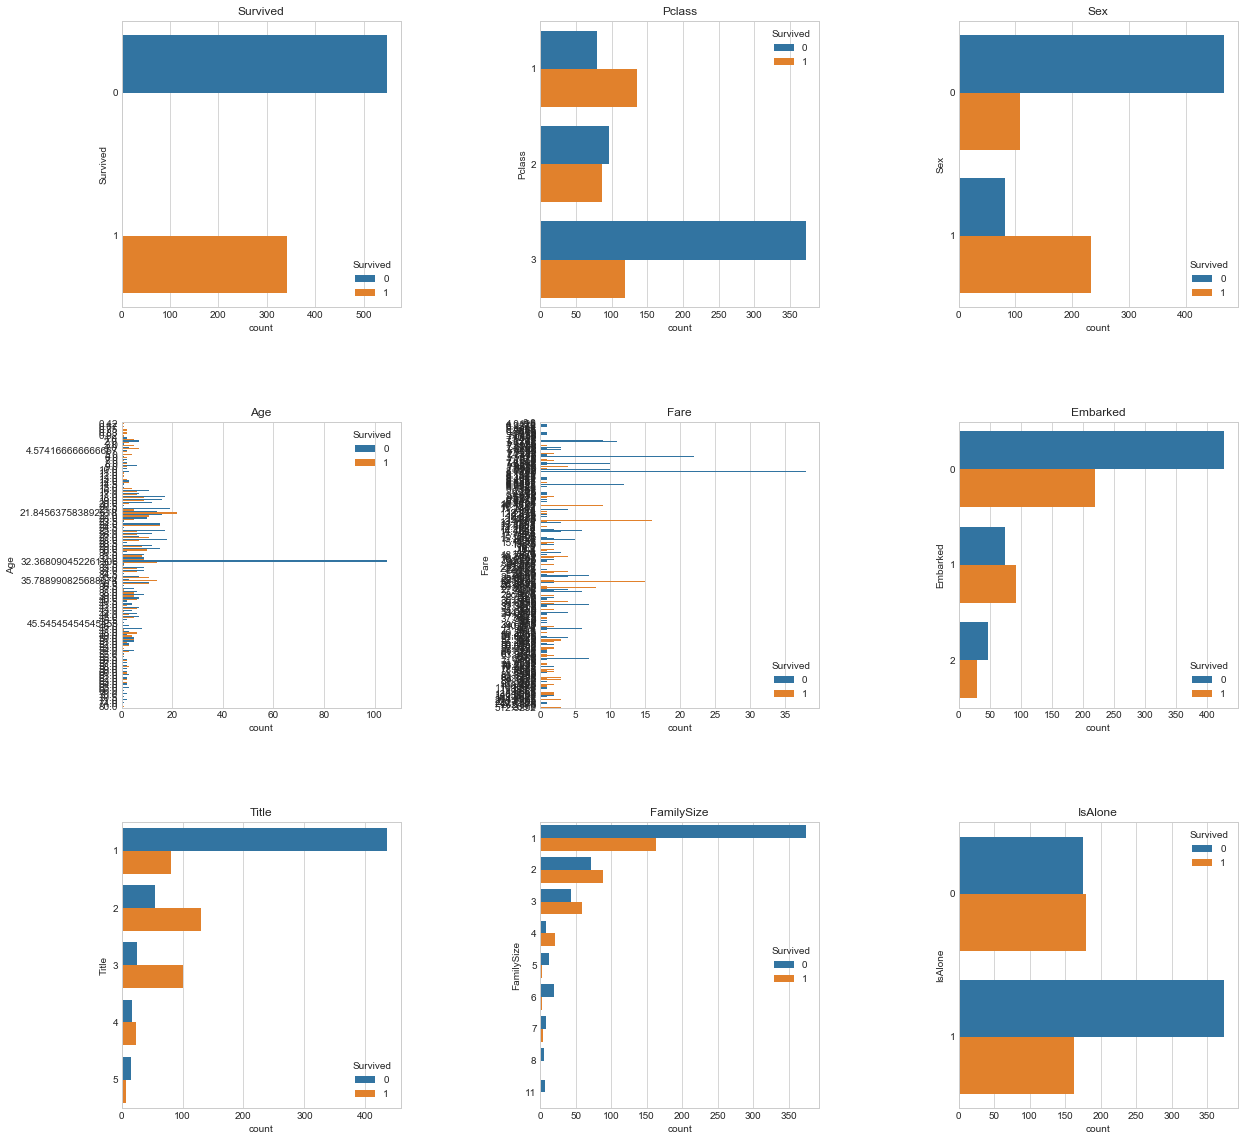

In [39]:
# Plot the numbers split by the target class
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.countplot(y=column, hue=hue, data=dataset)
train_df1=train_df[['Survived','Pclass','Sex','Fare','Embarked','Title','FamilySize']] 
plot_bivariate_bar(train_df, hue='Survived', cols=3, width=20, height=20, hspace=0.4, wspace=0.5)

## Better Visualization for continuous Features

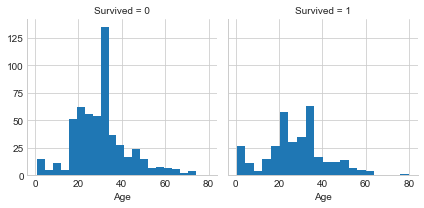

In [40]:
# The Same can be done for continuous features by distribution of the values or as the following 

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

**Observations**

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 15-25 year olds did not survive.

Most passengers are in 15-35 age range.

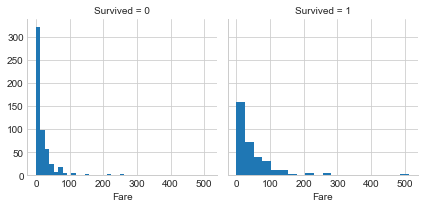

In [41]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
plt.show()

Observation:

Clearly those who had paid least, they did not Survive.

Those who had paid most(500$), all Survived. 

## Evaluating the three new features

The closer mean values to 1 means that most of that feature survived and vise versa for zero, however, the values close to 0.5 indicate that certain feature is probably non-informative or useless

In [42]:
# {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train_df[['Title', 'Survived']].groupby(['Title'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# train_df.groupby(['Title', 'Survived'], as_index=True)['Survived'].count()

,Survived
Title,
3,0.793651
2,0.702703
4,0.575000
5,0.347826
1,0.156673


In [43]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# train_df.groupby(['FamilySize', 'Survived'], as_index=True)['Survived'].count()

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [44]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean().sort_values(by='Survived', ascending=False)
# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


## Analysing Some assumption:
    
1. Women (Sex=female) were more likely to have survived.

2. The upper-class passengers (Pclass=1) were more likely to have survived.


In [45]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [46]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Considering three features
### Pclass, Age  ===> Survived
This analysis can be detailed to fill the nan age values .

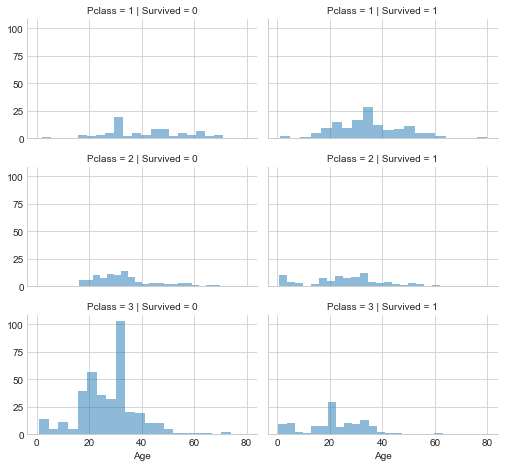

In [47]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

### PClass, Sex ====> Survived


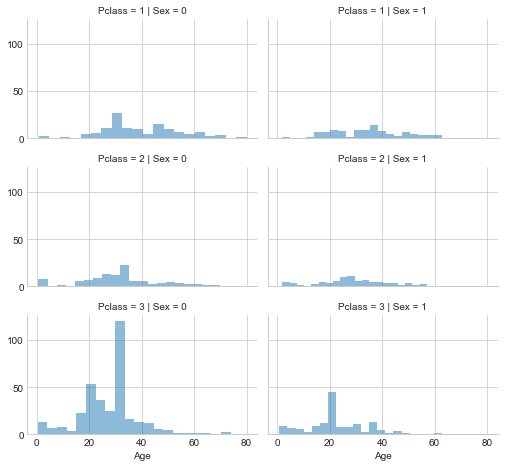

In [48]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

# Trasform Function for Test dataset

In [49]:
def prepare_dataset(dataset):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    dataset = dataset.drop(['Name', 'PassengerId'], axis=1, errors='ignore')

    dataset['Sex'] = np.where(dataset['Sex'] == 'female', 1, 0)

    dataset["Age"] = dataset.groupby("Title")["Age"].transform(lambda x: x.fillna(x.mean())) 

    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1

    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

    dataset = dataset.drop(['SibSp', 'Parch'], axis=1, errors='ignore')

    dataset = dataset.drop(['Ticket'], axis=1, errors='ignore')

    dataset = dataset.drop(['Cabin'], axis=1, errors='ignore')

    most_freq_port = dataset.Embarked.dropna().mode()[0]
    dataset['Embarked'] = dataset['Embarked'].fillna(most_freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    return dataset



test_df=prepare_dataset(test_df)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,34.5,7.8292,2,1,1,1
1,3,1,47.0,7.0000,0,3,2,0
2,2,0,62.0,9.6875,2,1,1,1
3,3,0,27.0,8.6625,0,1,1,1
4,3,1,22.0,12.2875,0,3,3,0


# Saving modified Datasets

In [50]:
train_df.to_csv("./output/train_modified.csv")
test_df.to_csv("./output/test_modified.csv")

# References:

Thanks to Kaggle Contributor Manav Sehgal: https://www.kaggle.com/startupsci/titanic-data-science-solutions

Thanks to Daniel Formoso: https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb 

Thanks to Daniel Bourke:https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb   

  